# Tìm hiểu cải thiện ảnh (Image enhancement, improvement) bằng kỹ thuật xử lý trên miền thời gian (các phép toán điểm ảnh và biểu đồ) và cài đặt thử nghiệm ứng dụng cải thiện ảnh với các chức năng: Thay đổi định dạng, màu sắc, tăng cường độ tương phản và biên tập ảnh (chèn thêm, bớt, xóa ...)

Thay đổi định dạng ảnh
- Chuyển đổi giữa các định dạng JPG, PNG, ..
- Chuyển đổi giữa định dạng kích thước của ảnh, phóng to thu nhỏ ảnh, biến đổi theo công thức hình chóp nào đó, thay đổi thông số kích thước width * height, pixel, dpi

Thay đổi màu sắc
- Chuyển đổi giữa các hệ màu RGB, CMYK, HSV, grayscale, ... (công thức tìm trên mạng)

Tăng cường độ tương phản
- Sử dụng các phép toán biểu đồ để tăng cường độ tương phản ảnh (chương 5, phần 2)

Biên tập ảnh
- Chèn 1 ảnh vào 1 ảnh khác
- Xoá 1 vùng của 1 ảnh



In [1]:
# Thư viện numpy và mathplotlib dùng để xử lí các phép toán số học và vẽ biểu đồ
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Thư viện OpenCV tích hợp sẵn các phép xử lí ảnh
import cv2 as cv2 

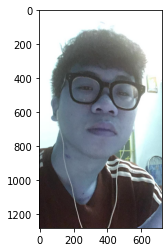

In [2]:
# Đọc ảnh bằng OpenCV
img = cv2.imread('data/hieu.jpg')
# Hiển thị ảnh
plt.imshow(img)
plt.show()

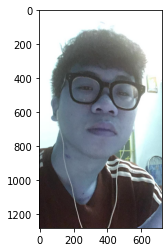

In [3]:
# Lưu ảnh dưới dạng png và đọc ngược lại
cv2.imwrite("data/hieu.png", img)
img_png = cv2.imread('data/hieu.png')
# Hiển thị ảnh
plt.imshow(img_png)
plt.show()

Kích thước trước khi resize:  (1280, 720, 3)
Kích thước sau khi resize:  (384, 504, 3)


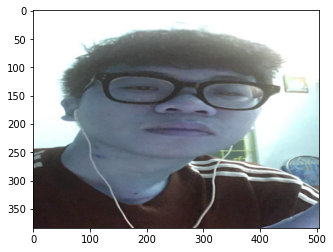

In [4]:
# Thay đổi định dạng kích thước của ảnh 

width_scale = 70
height_scale = 30

width = int(img.shape[1] * width_scale / 100)
height = int(img.shape[0] * height_scale / 100)
dim = (width, height)

img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# Các hằng số định nghĩa thuật toán sử dụng để resize của OpenCV
# INTER_LINEAR – a bilinear interpolation (used by default) 
# INTER_NEAREST – a nearest-neighbor interpolation
# INTER_AREA – resampling using pixel area relation. 
# It may be a preferred method for image decimation, as it gives moire’-free results. 
# But when the image is zoomed, it is similar to the INTER_NEAREST method.
# INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood 
# INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

print('Kích thước trước khi resize: ',img.shape)
print('Kích thước sau khi resize: ',img_resized.shape)
 
plt.imshow(img_resized)
plt.show()

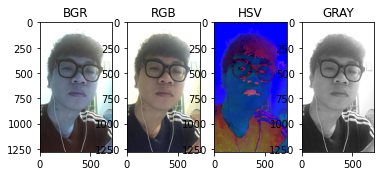

In [5]:
# Chuyển đổi hệ màu
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)



plt.subplot(141)
plt.imshow(img)
plt.title('BGR')

plt.subplot(142)
plt.imshow(img_rgb)
plt.title('RGB')

plt.subplot(143)
plt.imshow(img_hsv)
plt.title('HSV')

plt.subplot(144)
plt.imshow(img_gray,cmap='Greys_r')
plt.title('GRAY')

plt.show()

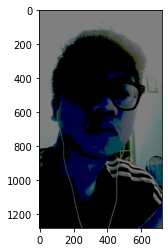

In [6]:
# Tăng cường độ tương phản
# filter f1
def filter_f1(img, alpha=1, a=0):
    w, h, c = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for k in range(c):
        for i in range(w):
            for j in range(h):
                if 0 <= img[i][j][k] and  img[i][j][k] < a:
                    ret[i][j][k] = 0
                else:
                    ret[i][j][k] = img[i][j][k] * alpha
    return ret
img_f1 = filter_f1(img,alpha=0.5,a=128)

plt.imshow(img_f1)
plt.show()

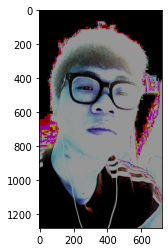

In [7]:
# filter f2
def filter_f2(img,a,b,beta,L):    
    w, h, c = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for k in range(c):
        for i in range(w):
            for j in range(h):
                if 0 <= img[i][j][k] and img[i][j][k] < a:
                    ret[i][j] = 0
                elif a <= img[i][j][k] and img[i][j][k] < b:
                    ret[i][j][k] = beta*(img[i][j][k] - a)
                elif b <= img[i][j][k] and img[i][j][k] < L:
                    ret[i][j][k] = beta*(b - a)
    return ret
img_f2 = filter_f2(img,a=50,b=100,beta=3,L=255)
plt.imshow(img_f2)
plt.show()

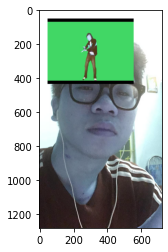

In [10]:
# Thêm 1 ảnh vào 1 ảnh 
img_insert = cv2.imread("data/hieu.jpg")
img_small = cv2.imread("data/banh.jpg")

x_offset = 50
y_offset = 50

width, height, _ = img_small.shape

img_insert[y_offset:y_offset+width, x_offset:x_offset+height] = img_small
plt.imshow(img_insert)
plt.show()

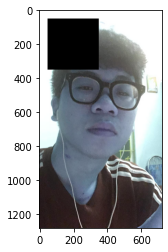

In [11]:
# Thêm 1 ảnh vào 1 ảnh 
img_delete = cv2.imread("data/hieu.jpg")

x_offset = 50
y_offset = 50

width = 300 
height = 300

img_delete[y_offset:y_offset+width, x_offset:x_offset+height] = 0
plt.imshow(img_delete)
plt.show()

In [ ]:
s_img = cv2.imread("smaller_image.png", -1)

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * l_img[y1:y2, x1:x2, c])

Kích thước trước khi resize:  (1800, 2880, 3)
Kích thước sau khi resize:  (256, 144, 3)


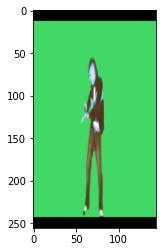

In [12]:
thien = cv2.imread("data/banh.png")

# Thay đổi định dạng kích thước của ảnh 

width_scale = 20
height_scale = 20

width = int(img.shape[1] * width_scale / 100)
height = int(img.shape[0] * height_scale / 100)
dim = (width, height)

img_resized = cv2.resize(thien, dim, interpolation = cv2.INTER_AREA)
# Các hằng số định nghĩa thuật toán sử dụng để resize của OpenCV
# INTER_LINEAR – a bilinear interpolation (used by default) 
# INTER_NEAREST – a nearest-neighbor interpolation
# INTER_AREA – resampling using pixel area relation. 
# It may be a preferred method for image decimation, as it gives moire’-free results. 
# But when the image is zoomed, it is similar to the INTER_NEAREST method.
# INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood 
# INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

print('Kích thước trước khi resize: ',thien.shape)
print('Kích thước sau khi resize: ',img_resized.shape)
 
plt.imshow(img_resized)
plt.show()